In [2]:
# 인코딩 양식 확인

import chardet
import pandas as pd

filename = '../data/investor_year/투자자별_거래실적_03.csv'

with open(filename, 'rb') as f:
    result = chardet.detect(f.readline())  # or read() if the file is small.
    print(result['encoding'])

EUC-KR


In [3]:
# 투자자별 거래실적 csv 파일 가져오기 - invest_03
import pandas as pd

invest_03 = pd.read_csv('../data/investor_year/투자자별_거래실적_03.csv', encoding='EUC-KR', index_col=0)
invest_03.head()

,거래량_매도,거래량_매수,거래량_순매수,거래대금_매도,거래대금_매수,거래대금_순매수
투자자구분,,,,,,
금융투자,1129315.0,1027833.0,-101482.0,20557.0,19669.0,-888.0
보험,278545.0,194139.0,-84406.0,4670.0,3906.0,-765.0
투신,2620910.0,2359839.0,-261071.0,51318.0,44183.0,-7135.0
사모,0.0,0.0,0.0,0.0,0.0,0.0
은행,722595.0,364065.0,-358530.0,7985.0,7339.0,-646.0


In [4]:
# 에러 발생 : index [0]을 인지하지 못해서 생기는 에러

invest_03.drop([0], inplace=True)
invest_03.head()

KeyError: '[0] not found in axis'

In [5]:
# invest_03 index 정상 출력 확인
invest_03.index

Index(['금융투자', '보험', '투신', '사모', '은행', '기타금융', '연기금 등', '기관합계', '기타법인', '개인',
       '외국인', '기타외국인', '전체'],
      dtype='object', name='투자자구분')

In [6]:
# invest_03 사용하지 않을 index drop 연습
invest_03.drop(index='금융투자', inplace=True)
invest_03.head(2)

,거래량_매도,거래량_매수,거래량_순매수,거래대금_매도,거래대금_매수,거래대금_순매수
투자자구분,,,,,,
보험,278545.0,194139.0,-84406.0,4670.0,3906.0,-765.0
투신,2620910.0,2359839.0,-261071.0,51318.0,44183.0,-7135.0


In [7]:
# invest_03 불필요한 나머지 '금융투자', '보험', '투신' index 삭제
rows_to_drop = ['보험', '투신', '사모', '은행', '기타금융','연기금 등']
invest_03.drop(index=rows_to_drop, inplace=True)

# 결과 확인
invest_03


,거래량_매도,거래량_매수,거래량_순매수,거래대금_매도,거래대금_매수,거래대금_순매수
투자자구분,,,,,,
기관합계,6968048.0,5793933.0,-1174115.0,111856.0,104016.0,-7840.0
기타법인,0.0,0.0,0.0,0.0,0.0,0.0
개인,124511644.0,124950605.0,438961.0,362772.0,356891.0,-5881.0
외국인,2996350.0,3731607.0,735257.0,78042.0,91758.0,13716.0
기타외국인,7578.0,7475.0,-103.0,44.0,49.0,5.0
전체,134483619.0,134483619.0,0.0,552714.0,552714.0,0.0


In [8]:
# invest_03 불필요한 column 삭제
invest_03.drop(columns=['거래량_매도', '거래량_매수', '거래량_순매수'], inplace=True)
invest_03

,거래대금_매도,거래대금_매수,거래대금_순매수
투자자구분,,,
기관합계,111856.0,104016.0,-7840.0
기타법인,0.0,0.0,0.0
개인,362772.0,356891.0,-5881.0
외국인,78042.0,91758.0,13716.0
기타외국인,44.0,49.0,5.0
전체,552714.0,552714.0,0.0


In [9]:
# column명 바꾸기 - 미리 연도별로 바꿀 경우 DF합칠 때 어려움 발생
col_03 = {
    '거래대금_매도': '매도_03',
    '거래대금_매수': '매수_03',
    '거래대금_순매수': '순매수_03'
}
invest_03.rename(columns=col_03, inplace=True)

invest_03

,매도_03,매수_03,순매수_03
투자자구분,,,
기관합계,111856.0,104016.0,-7840.0
기타법인,0.0,0.0,0.0
개인,362772.0,356891.0,-5881.0
외국인,78042.0,91758.0,13716.0
기타외국인,44.0,49.0,5.0
전체,552714.0,552714.0,0.0


In [10]:
# 투자자별 거래실적 csv 파일 가져오기 - invest_04
import pandas as pd

invest_04 = pd.read_csv('../data/investor_year/투자자별_거래실적_04.csv', encoding='EUC-KR', index_col=0)
invest_04.head()

,거래량_매도,거래량_매수,거래량_순매수,거래대금_매도,거래대금_매수,거래대금_순매수
투자자구분,,,,,,
금융투자,582315.0,535704.0,-46612.0,12459.0,11949.0,-510.0
보험,219489.0,202247.0,-17242.0,4883.0,4423.0,-459.0
투신,2340068.0,2230482.0,-109586.0,53923.0,49094.0,-4829.0
사모,0.0,0.0,0.0,0.0,0.0,0.0
은행,428233.0,336886.0,-91347.0,8319.0,6644.0,-1675.0


In [11]:
# invest_04 불필요한 행, 열 삭제, column 명 바꾸기
rows_to_drop = ['금융투자', '보험', '투신', '사모', '은행', '기타금융','연기금 등']
invest_04.drop(index=rows_to_drop, inplace=True)
invest_04.drop(columns=['거래량_매도', '거래량_매수', '거래량_순매수'], inplace=True)

col_04 = {
    '거래대금_매도': '매도_04',
    '거래대금_매수': '매수_04',
    '거래대금_순매수': '순매수_04'
}
invest_04.rename(columns=col_04, inplace=True)

invest_04


,매도_04,매수_04,순매수_04
투자자구분,,,
기관합계,111836.0,108107.0,-3729.0
기타법인,0.0,0.0,0.0
개인,326204.0,319565.0,-6640.0
외국인,119887.0,130382.0,10495.0
기타외국인,667.0,540.0,-127.0
전체,558594.0,558594.0,0.0


In [12]:
# 투자자별 거래실적 csv 파일 가져오기 - invest_05
import pandas as pd

invest_05 = pd.read_csv('../data/investor_year/투자자별_거래실적_05.csv', encoding='EUC-KR', index_col=0)
invest_05.head()
# 불필요한 행, 열 삭제
rows_to_drop = ['금융투자', '보험', '투신', '사모', '은행', '기타금융','연기금 등']
invest_05.drop(index=rows_to_drop, inplace=True)
invest_05.drop(columns=['거래량_매도', '거래량_매수', '거래량_순매수'], inplace=True)


col_05 = {
    '거래대금_매도': '매도_05',
    '거래대금_매수': '매수_05',
    '거래대금_순매수': '순매수_05'
}
invest_05.rename(columns=col_05, inplace=True)

invest_05

,매도_05,매수_05,순매수_05
투자자구분,,,
기관합계,140357.0,152750.0,12394.0
기타법인,0.0,0.0,0.0
개인,484044.0,476031.0,-8013.0
외국인,162967.0,159787.0,-3180.0
기타외국인,1974.0,774.0,-1200.0
전체,789342.0,789342.0,0.0


In [13]:
# 투자자별 거래실적 csv 파일 가져오기 - invest_06
import pandas as pd

invest_06 = pd.read_csv('../data/investor_year/투자자별_거래실적_06.csv', encoding='EUC-KR', index_col=0)
invest_06.head()
# 불필요한 행, 열 삭제
rows_to_drop = ['금융투자', '보험', '투신', '사모', '은행', '기타금융','연기금 등']
invest_06.drop(index=rows_to_drop, inplace=True)
invest_06.drop(columns=['거래량_매도', '거래량_매수', '거래량_순매수'], inplace=True)

col_06 = {
    '거래대금_매도': '매도_06',
    '거래대금_매수': '매수_06',
    '거래대금_순매수': '순매수_06'
}
invest_06.rename(columns=col_06, inplace=True)

invest_06

,매도_06,매수_06,순매수_06
투자자구분,,,
기관합계,211588.0,226376.0,14788.0
기타법인,0.0,0.0,0.0
개인,461185.0,458356.0,-2829.0
외국인,225580.0,214391.0,-11189.0
기타외국인,1542.0,771.0,-771.0
전체,899895.0,899895.0,0.0


In [14]:
# 투자자별 거래실적 csv 파일 가져오기 - invest_07
import pandas as pd

invest_07 = pd.read_csv('../data/investor_year/투자자별_거래실적_07.csv', encoding='EUC-KR', index_col=0)
invest_07.head()
# 불필요한 행, 열 삭제
rows_to_drop = ['금융투자', '보험', '투신', '사모', '은행', '기타금융','연기금 등']
invest_07.drop(index=rows_to_drop, inplace=True)
invest_07.drop(columns=['거래량_매도', '거래량_매수', '거래량_순매수'], inplace=True)

col_07 = {
    '거래대금_매도': '매도_07',
    '거래대금_매수': '매수_07',
    '거래대금_순매수': '순매수_07'
}
invest_07.rename(columns=col_07, inplace=True)

invest_07

,매도_07,매수_07,순매수_07
투자자구분,,,
기관합계,327579.0,353808.0,26230.0
기타법인,0.0,0.0,0.0
개인,759338.0,766261.0,6923.0
외국인,353030.0,322348.0,-30682.0
기타외국인,3880.0,1409.0,-2470.0
전체,1443826.0,1443826.0,0.0


In [15]:
# 투자자별 거래실적 csv 파일 가져오기 - invest_08
import pandas as pd

invest_08 = pd.read_csv('../data/investor_year/투자자별_거래실적_08.csv', encoding='EUC-KR', index_col=0)
invest_08.head()
# 불필요한 행, 열 삭제
rows_to_drop = ['금융투자', '보험', '투신', '사모', '은행', '기타금융','연기금 등']
invest_08.drop(index=rows_to_drop, inplace=True)
invest_08.drop(columns=['거래량_매도', '거래량_매수', '거래량_순매수'], inplace=True)

col_08 = {
    '거래대금_매도': '매도_08',
    '거래대금_매수': '매수_08',
    '거래대금_순매수': '순매수_08'
}
invest_08.rename(columns=col_08, inplace=True)

invest_08

,매도_08,매수_08,순매수_08
투자자구분,,,
기관합계,348544.0,388782.0,40238.0
기타법인,0.0,0.0,0.0
개인,698176.0,701776.0,3600.0
외국인,357702.0,314844.0,-42858.0
기타외국인,2447.0,1466.0,-980.0
전체,1406869.0,1406869.0,0.0


In [16]:
# 투자자별 거래실적 csv 파일 가져오기 - invest_09
import pandas as pd

invest_09 = pd.read_csv('../data/investor_year/투자자별_거래실적_09.csv', encoding='EUC-KR', index_col=0)
invest_09.head()
# 불필요한 행, 열 삭제
rows_to_drop = ['금융투자', '보험', '투신', '사모', '은행', '기타금융','연기금 등']
invest_09.drop(index=rows_to_drop, inplace=True)
invest_09.drop(columns=['거래량_매도', '거래량_매수', '거래량_순매수'], inplace=True)

col_09 = {
    '거래대금_매도': '매도_09',
    '거래대금_매수': '매수_09',
    '거래대금_순매수': '순매수_09'
}
invest_09.rename(columns=col_09, inplace=True)

invest_09

,매도_09,매수_09,순매수_09
투자자구분,,,
기관합계,455116.0,437899.0,-17218.0
기타법인,23626.0,20799.0,-2827.0
개인,982899.0,981502.0,-1397.0
외국인,247370.0,270824.0,23454.0
기타외국인,4234.0,2221.0,-2013.0
전체,1713245.0,1713245.0,0.0


In [17]:
# 투자자별 거래실적 csv 파일 가져오기 - invest_10
import pandas as pd

invest_10 = pd.read_csv('../data/investor_year/투자자별_거래실적_10.csv', encoding='EUC-KR', index_col=0)
invest_10.head()
# 불필요한 행, 열 삭제
rows_to_drop = ['금융투자', '보험', '투신', '사모', '은행', '기타금융','연기금 등']
invest_10.drop(index=rows_to_drop, inplace=True)
invest_10.drop(columns=['거래량_매도', '거래량_매수', '거래량_순매수'], inplace=True)

col_10 = {
    '거래대금_매도': '매도_10',
    '거래대금_매수': '매수_10',
    '거래대금_순매수': '순매수_10'
}
invest_10.rename(columns=col_10, inplace=True)

invest_10

,매도_10,매수_10,순매수_10
투자자구분,,,
기관합계,537897.0,524055.0,-13843.0
기타법인,29613.0,26106.0,-3507.0
개인,998446.0,993745.0,-4701.0
외국인,280703.0,302915.0,22213.0
기타외국인,2554.0,2392.0,-161.0
전체,1849212.0,1849212.0,0.0


In [18]:
# 투자자별 거래실적 csv 파일 가져오기 - invest_11
import pandas as pd

invest_11 = pd.read_csv('../data/investor_year/투자자별_거래실적_11.csv', encoding='EUC-KR', index_col=0)
invest_11.head()
# 불필요한 행, 열 삭제
rows_to_drop = ['금융투자', '보험', '투신', '사모', '은행', '기타금융','연기금 등']
invest_11.drop(index=rows_to_drop, inplace=True)
invest_11.drop(columns=['거래량_매도', '거래량_매수', '거래량_순매수'], inplace=True)

col_11 = {
    '거래대금_매도': '매도_11',
    '거래대금_매수': '매수_11',
    '거래대금_순매수': '순매수_11'
}
invest_11.rename(columns=col_11, inplace=True)

invest_11

,매도_11,매수_11,순매수_11
투자자구분,,,
기관합계,592725.0,602630.0,9905.0
기타법인,31379.0,29410.0,-1968.0
개인,1163415.0,1163428.0,13.0
외국인,351576.0,343760.0,-7815.0
기타외국인,3237.0,3103.0,-134.0
전체,2142331.0,2142331.0,0.0


In [19]:
# 투자자별 거래실적 csv 파일 가져오기 - invest_12
import pandas as pd

invest_12 = pd.read_csv('../data/investor_year/투자자별_거래실적_12.csv', encoding='EUC-KR', index_col=0)
invest_12.head()
# 불필요한 행, 열 삭제
rows_to_drop = ['금융투자', '보험', '투신', '사모', '은행', '기타금융','연기금 등']
invest_12.drop(index=rows_to_drop, inplace=True)
invest_12.drop(columns=['거래량_매도', '거래량_매수', '거래량_순매수'], inplace=True)

col_12 = {
    '거래대금_매도': '매도_12',
    '거래대금_매수': '매수_12',
    '거래대금_순매수': '순매수_12'
}
invest_12.rename(columns=col_12, inplace=True)

invest_12

,매도_12,매수_12,순매수_12
투자자구분,,,
기관합계,356355.0,359152.0,2797.0
기타법인,20427.0,15665.0,-4761.0
개인,703235.0,687984.0,-15250.0
외국인,308361.0,326353.0,17991.0
기타외국인,2787.0,2010.0,-776.0
전체,1391165.0,1391165.0,0.0


In [20]:
# 투자자별 거래실적 csv 파일 가져오기 - invest_13
import pandas as pd

invest_13 = pd.read_csv('../data/investor_year/투자자별_거래실적_13.csv', encoding='EUC-KR', index_col=0)
invest_13.head()
# 불필요한 행, 열 삭제
rows_to_drop = ['금융투자', '보험', '투신', '사모', '은행', '기타금융','연기금 등']
invest_13.drop(index=rows_to_drop, inplace=True)
invest_13.drop(columns=['거래량_매도', '거래량_매수', '거래량_순매수'], inplace=True)

col_13 = {
    '거래대금_매도': '매도_13',
    '거래대금_매수': '매수_13',
    '거래대금_순매수': '순매수_13'
}
invest_13.rename(columns=col_13, inplace=True)

invest_13

,매도_13,매수_13,순매수_13
투자자구분,,,
기관합계,305881.0,310156.0,4276.0
기타법인,15117.0,12574.0,-2543.0
개인,545178.0,540597.0,-4582.0
외국인,342794.0,345845.0,3051.0
기타외국인,2023.0,1821.0,-202.0
전체,1210993.0,1210993.0,0.0


In [21]:
# 투자자별 거래실적 csv 파일 가져오기 - invest_14
import pandas as pd

invest_14 = pd.read_csv('../data/investor_year/투자자별_거래실적_14.csv', encoding='EUC-KR', index_col=0)
invest_14.head()
# 불필요한 행, 열 삭제
rows_to_drop = ['금융투자', '보험', '투신', '사모', '은행', '기타금융','연기금 등']
invest_14.drop(index=rows_to_drop, inplace=True)
invest_14.drop(columns=['거래량_매도', '거래량_매수', '거래량_순매수'], inplace=True)

col_14 = {
    '거래대금_매도': '매도_14',
    '거래대금_매수': '매수_14',
    '거래대금_순매수': '순매수_14'
}
invest_14.rename(columns=col_14, inplace=True)

invest_14

,매도_14,매수_14,순매수_14
투자자구분,,,
기관합계,307909.0,306822.0,-1088.0
기타법인,16746.0,15613.0,-1133.0
개인,501387.0,499530.0,-1857.0
외국인,336371.0,340590.0,4219.0
기타외국인,1905.0,1765.0,-141.0
전체,1164319.0,1164319.0,0.0


In [22]:
# 투자자별 거래실적 csv 파일 가져오기 - invest_15
import pandas as pd

invest_15 = pd.read_csv('../data/investor_year/투자자별_거래실적_15.csv', encoding='EUC-KR', index_col=0)
invest_15.head()
# 불필요한 행, 열 삭제
rows_to_drop = ['금융투자', '보험', '투신', '사모', '은행', '기타금융','연기금 등']
invest_15.drop(index=rows_to_drop, inplace=True)
invest_15.drop(columns=['거래량_매도', '거래량_매수', '거래량_순매수'], inplace=True)

col_15 = {
    '거래대금_매도': '매도_15',
    '거래대금_매수': '매수_15',
    '거래대금_순매수': '순매수_15'
}
invest_15.rename(columns=col_15, inplace=True)

invest_15

,매도_15,매수_15,순매수_15
투자자구분,,,
기관합계,326309.0,326802.0,493.0
기타법인,17162.0,22478.0,5316.0
개인,794050.0,793280.0,-770.0
외국인,384477.0,380268.0,-4208.0
기타외국인,3228.0,2398.0,-831.0
전체,1525225.0,1525225.0,0.0


In [23]:
# 투자자별 거래실적 csv 파일 가져오기 - invest_16
import pandas as pd

invest_16 = pd.read_csv('../data/investor_year/투자자별_거래실적_16.csv', encoding='EUC-KR', index_col=0)
invest_16.head()
# 불필요한 행, 열 삭제
rows_to_drop = ['금융투자', '보험', '투신', '사모', '은행', '기타금융','연기금 등']
invest_16.drop(index=rows_to_drop, inplace=True)
invest_16.drop(columns=['거래량_매도', '거래량_매수', '거래량_순매수'], inplace=True)

col_16 = {
    '거래대금_매도': '매도_16',
    '거래대금_매수': '매수_16',
    '거래대금_순매수': '순매수_16'
}
invest_16.rename(columns=col_16, inplace=True)

invest_16

,매도_16,매수_16,순매수_16
투자자구분,,,
기관합계,308080.0,301916.0,-6164.0
기타법인,17265.0,20256.0,2991.0
개인,650450.0,642127.0,-8324.0
외국인,357611.0,369560.0,11949.0
기타외국인,2201.0,1749.0,-452.0
전체,1335608.0,1335608.0,0.0


In [24]:
# 투자자별 거래실적 csv 파일 가져오기 - invest_17
import pandas as pd

invest_17 = pd.read_csv('../data/investor_year/투자자별_거래실적_17.csv', encoding='EUC-KR', index_col=0)
invest_17.head()
# 불필요한 행, 열 삭제
rows_to_drop = ['금융투자', '보험', '투신', '사모', '은행', '기타금융','연기금 등']
invest_17.drop(index=rows_to_drop, inplace=True)
invest_17.drop(columns=['거래량_매도', '거래량_매수', '거래량_순매수'], inplace=True)

col_17 = {
    '거래대금_매도': '매도_17',
    '거래대금_매수': '매수_17',
    '거래대금_순매수': '순매수_17'
}
invest_17.rename(columns=col_17, inplace=True)

invest_17

,매도_17,매수_17,순매수_17
투자자구분,,,
기관합계,392401.0,392895.0,494.0
기타법인,17086.0,22610.0,5524.0
개인,704050.0,695486.0,-8564.0
외국인,448821.0,451582.0,2761.0
기타외국인,2285.0,2069.0,-216.0
전체,1564642.0,1564642.0,0.0


In [25]:
# 투자자별 거래실적 csv 파일 가져오기 - invest_18
import pandas as pd

invest_18 = pd.read_csv('../data/investor_year/투자자별_거래실적_18.csv', encoding='EUC-KR', index_col=0)
invest_18.head()
# 불필요한 행, 열 삭제
rows_to_drop = ['금융투자', '보험', '투신', '사모', '은행', '기타금융','연기금 등']
invest_18.drop(index=rows_to_drop, inplace=True)
invest_18.drop(columns=['거래량_매도', '거래량_매수', '거래량_순매수'], inplace=True)

col_18 = {
    '거래대금_매도': '매도_18',
    '거래대금_매수': '매수_18',
    '거래대금_순매수': '순매수_18'
}
invest_18.rename(columns=col_18, inplace=True)

invest_18

,매도_18,매수_18,순매수_18
투자자구분,,,
기관합계,464750.0,462881.0,-1868.0
기타법인,21348.0,23052.0,1704.0
개인,962448.0,971304.0,8856.0
외국인,543255.0,534598.0,-8658.0
기타외국인,2246.0,2212.0,-34.0
전체,1994047.0,1994047.0,0.0


In [26]:
# 투자자별 거래실적 csv 파일 가져오기 - invest_19
import pandas as pd

invest_19 = pd.read_csv('../data/investor_year/투자자별_거래실적_19.csv', encoding='EUC-KR', index_col=0)
invest_19.head()
# 불필요한 행, 열 삭제
rows_to_drop = ['금융투자', '보험', '투신', '사모', '은행', '기타금융','연기금 등']
invest_19.drop(index=rows_to_drop, inplace=True)
invest_19.drop(columns=['거래량_매도', '거래량_매수', '거래량_순매수'], inplace=True)

col_19 = {
    '거래대금_매도': '매도_19',
    '거래대금_매수': '매수_19',
    '거래대금_순매수': '순매수_19'
}
invest_19.rename(columns=col_19, inplace=True)

invest_19

,매도_19,매수_19,순매수_19
투자자구분,,,
기관합계,391096.0,401265.0,10169.0
기타법인,13396.0,15447.0,2051.0
개인,731012.0,719984.0,-11028.0
외국인,451833.0,450753.0,-1080.0
기타외국인,1627.0,1514.0,-113.0
전체,1588964.0,1588964.0,0.0


In [27]:
# 투자자별 거래실적 csv 파일 가져오기 - invest_20
import pandas as pd

invest_20 = pd.read_csv('../data/investor_year/투자자별_거래실적_20.csv', encoding='EUC-KR', index_col=0)
invest_20.head()
# 불필요한 행, 열 삭제
rows_to_drop = ['금융투자', '보험', '투신', '사모', '은행', '기타금융','연기금 등']
invest_20.drop(index=rows_to_drop, inplace=True)
invest_20.drop(columns=['거래량_매도', '거래량_매수', '거래량_순매수'], inplace=True)

col_20 = {
    '거래대금_매도': '매도_20',
    '거래대금_매수': '매수_20',
    '거래대금_순매수': '순매수_20'
}
invest_20.rename(columns=col_20, inplace=True)

invest_20

,매도_20,매수_20,순매수_20
투자자구분,,,
기관합계,715417.0,680720.0,-34697.0
기타법인,33445.0,36141.0,2697.0
개인,2407494.0,2461599.0,54105.0
외국인,877862.0,855681.0,-22181.0
기타외국인,5689.0,5766.0,76.0
전체,4039907.0,4039907.0,0.0


In [28]:
# 투자자별 거래실적 csv 파일 가져오기 - invest_21
import pandas as pd

invest_21 = pd.read_csv('../data/investor_year/투자자별_거래실적_21.csv', encoding='EUC-KR', index_col=0)
invest_21.head()
# 불필요한 행, 열 삭제
rows_to_drop = ['금융투자', '보험', '투신', '사모', '은행', '기타금융','연기금 등']
invest_21.drop(index=rows_to_drop, inplace=True)
invest_21.drop(columns=['거래량_매도', '거래량_매수', '거래량_순매수'], inplace=True)

col_21 = {
    '거래대금_매도': '매도_21',
    '거래대금_매수': '매수_21',
    '거래대금_순매수': '순매수_21'
}
invest_21.rename(columns=col_21, inplace=True)


invest_21

,매도_21,매수_21,순매수_21
투자자구분,,,
기관합계,871075.0,822672.0,-48403.0
기타법인,41416.0,39790.0,-1626.0
개인,2714439.0,2790221.0,75782.0
외국인,971628.0,945629.0,-25998.0
기타외국인,6834.0,7080.0,245.0
전체,4605392.0,4605392.0,0.0


In [29]:
# 투자자별 거래실적 csv 파일 가져오기 - invest_22
import pandas as pd

invest_22 = pd.read_csv('../data/investor_year/투자자별_거래실적_22.csv', encoding='EUC-KR', index_col=0)
invest_22.head()
# 불필요한 행, 열 삭제
rows_to_drop = ['금융투자', '보험', '투신', '사모', '은행', '기타금융','연기금 등']
invest_22.drop(index=rows_to_drop, inplace=True)
invest_22.drop(columns=['거래량_매도', '거래량_매수', '거래량_순매수'], inplace=True)

col_22 = {
    '거래대금_매도': '매도_22',
    '거래대금_매수': '매수_22',
    '거래대금_순매수': '순매수_22'
}
invest_22.rename(columns=col_22, inplace=True)


invest_22

,매도_22,매수_22,순매수_22
투자자구분,,,
기관합계,653665.0,633299.0,-20366.0
기타법인,26275.0,29058.0,2783.0
개인,1509969.0,1532383.0,22414.0
외국인,775293.0,770810.0,-4483.0
기타외국인,4274.0,3926.0,-349.0
전체,2969477.0,2969477.0,0.0


In [30]:
# 투자자별 거래실적 csv 파일 가져오기 - invest_23
import pandas as pd

invest_23 = pd.read_csv('../data/investor_year/투자자별_거래실적_23.csv', encoding='EUC-KR', index_col=0)
invest_23.head()
# 불필요한 행, 열 삭제
rows_to_drop = ['금융투자', '보험', '투신', '사모', '은행', '기타금융','연기금 등']
invest_23.drop(index=rows_to_drop, inplace=True)
invest_23.drop(columns=['거래량_매도', '거래량_매수', '거래량_순매수'], inplace=True)

col_23 = {
    '거래대금_매도': '매도_23',
    '거래대금_매수': '매수_23',
    '거래대금_순매수': '순매수_23'
}
invest_23.rename(columns=col_23, inplace=True)


invest_23


,매도_23,매수_23,순매수_23
투자자구분,,,
기관합계,711020.0,706085.0,-4935.0
기타법인,37526.0,38976.0,1450.0
개인,1690266.0,1678754.0,-11512.0
외국인,763390.0,778513.0,15123.0
기타외국인,4791.0,4664.0,-127.0
전체,3206993.0,3206993.0,0.0


In [31]:
# column '매도' 하나의 DF로 - invest_sell

import pandas as pd

# 특정 열만 DF로 합치기
invest_a = [invest_03, invest_04, invest_05, invest_06, invest_07, invest_08, invest_09, invest_10,
       invest_11, invest_12, invest_13, invest_14, invest_15, invest_16, invest_17, invest_18,
       invest_19, invest_20, invest_21, invest_22, invest_23]

# 매도로 시작하는 컬럼 합치기
sell_columns = [df.filter(regex='^매도_') for df in invest_a]
invest_sell = pd.concat(sell_columns, axis=1)

invest_sell

,매도_03,매도_04,매도_05,매도_06,매도_07,매도_08,매도_09,매도_10,매도_11,매도_12,...,매도_14,매도_15,매도_16,매도_17,매도_18,매도_19,매도_20,매도_21,매도_22,매도_23
투자자구분,,,,,,,,,,,,,,,,,,,,,
기관합계,111856.0,111836.0,140357.0,211588.0,327579.0,348544.0,455116.0,537897.0,592725.0,356355.0,...,307909.0,326309.0,308080.0,392401.0,464750.0,391096.0,715417.0,871075.0,653665.0,711020.0
기타법인,0.0,0.0,0.0,0.0,0.0,0.0,23626.0,29613.0,31379.0,20427.0,...,16746.0,17162.0,17265.0,17086.0,21348.0,13396.0,33445.0,41416.0,26275.0,37526.0
개인,362772.0,326204.0,484044.0,461185.0,759338.0,698176.0,982899.0,998446.0,1163415.0,703235.0,...,501387.0,794050.0,650450.0,704050.0,962448.0,731012.0,2407494.0,2714439.0,1509969.0,1690266.0
외국인,78042.0,119887.0,162967.0,225580.0,353030.0,357702.0,247370.0,280703.0,351576.0,308361.0,...,336371.0,384477.0,357611.0,448821.0,543255.0,451833.0,877862.0,971628.0,775293.0,763390.0
기타외국인,44.0,667.0,1974.0,1542.0,3880.0,2447.0,4234.0,2554.0,3237.0,2787.0,...,1905.0,3228.0,2201.0,2285.0,2246.0,1627.0,5689.0,6834.0,4274.0,4791.0
전체,552714.0,558594.0,789342.0,899895.0,1443826.0,1406869.0,1713245.0,1849212.0,2142331.0,1391165.0,...,1164319.0,1525225.0,1335608.0,1564642.0,1994047.0,1588964.0,4039907.0,4605392.0,2969477.0,3206993.0


In [32]:
# invest_sell column 연도별로 바꾸기

sell_columns_change = {
    '매도_03': '2003년', '매도_04': '2004년', '매도_05': '2005년', '매도_06': '2006년', '매도_07': '2007년', '매도_08': '2008년', '매도_09': '2009년', '매도_10': '2010년', 
    '매도_11': '2011년', '매도_12': '2012년', '매도_13': '2013년', '매도_14': '2014년', '매도_15': '2015년', '매도_16': '2016년', '매도_17': '2017년', '매도_18': '2018년', 
    '매도_19': '2019년', '매도_20': '2020년', '매도_21': '2021년', '매도_22': '2022년', '매도_23': '2023년', 
    
}
invest_sell.rename(columns=sell_columns_change, inplace=True)


invest_sell


,2003년,2004년,2005년,2006년,2007년,2008년,2009년,2010년,2011년,2012년,...,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
투자자구분,,,,,,,,,,,,,,,,,,,,,
기관합계,111856.0,111836.0,140357.0,211588.0,327579.0,348544.0,455116.0,537897.0,592725.0,356355.0,...,307909.0,326309.0,308080.0,392401.0,464750.0,391096.0,715417.0,871075.0,653665.0,711020.0
기타법인,0.0,0.0,0.0,0.0,0.0,0.0,23626.0,29613.0,31379.0,20427.0,...,16746.0,17162.0,17265.0,17086.0,21348.0,13396.0,33445.0,41416.0,26275.0,37526.0
개인,362772.0,326204.0,484044.0,461185.0,759338.0,698176.0,982899.0,998446.0,1163415.0,703235.0,...,501387.0,794050.0,650450.0,704050.0,962448.0,731012.0,2407494.0,2714439.0,1509969.0,1690266.0
외국인,78042.0,119887.0,162967.0,225580.0,353030.0,357702.0,247370.0,280703.0,351576.0,308361.0,...,336371.0,384477.0,357611.0,448821.0,543255.0,451833.0,877862.0,971628.0,775293.0,763390.0
기타외국인,44.0,667.0,1974.0,1542.0,3880.0,2447.0,4234.0,2554.0,3237.0,2787.0,...,1905.0,3228.0,2201.0,2285.0,2246.0,1627.0,5689.0,6834.0,4274.0,4791.0
전체,552714.0,558594.0,789342.0,899895.0,1443826.0,1406869.0,1713245.0,1849212.0,2142331.0,1391165.0,...,1164319.0,1525225.0,1335608.0,1564642.0,1994047.0,1588964.0,4039907.0,4605392.0,2969477.0,3206993.0


In [33]:
# column '매수'를 연도별로 하나의 DF로 - invest_buy

import pandas as pd

invest_b = [invest_03, invest_04, invest_05, invest_06, invest_07, invest_08, invest_09, invest_10,
       invest_11, invest_12, invest_13, invest_14, invest_15, invest_16, invest_17, invest_18,
       invest_19, invest_20, invest_21, invest_22, invest_23]

buy_columns = [df.filter(regex='^매수_') for df in invest_b]
invest_buy = pd.concat(buy_columns, axis=1)

buy_columns_change = {
    '매수_03': '2003년', '매수_04': '2004년', '매수_05': '2005년', '매수_06': '2006년', '매수_07': '2007년', '매수_08': '2008년', '매수_09': '2009년', '매수_10': '2010년', 
    '매수_11': '2011년', '매수_12': '2012년', '매수_13': '2013년', '매수_14': '2014년', '매수_15': '2015년', '매수_16': '2016년', '매수_17': '2017년', '매수_18': '2018년', 
    '매수_19': '2019년', '매수_20': '2020년', '매수_21': '2021년', '매수_22': '2022년', '매수_23': '2023년', 
    
}
invest_buy.rename(columns=buy_columns_change, inplace=True)

invest_buy

,2003년,2004년,2005년,2006년,2007년,2008년,2009년,2010년,2011년,2012년,...,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
투자자구분,,,,,,,,,,,,,,,,,,,,,
기관합계,104016.0,108107.0,152750.0,226376.0,353808.0,388782.0,437899.0,524055.0,602630.0,359152.0,...,306822.0,326802.0,301916.0,392895.0,462881.0,401265.0,680720.0,822672.0,633299.0,706085.0
기타법인,0.0,0.0,0.0,0.0,0.0,0.0,20799.0,26106.0,29410.0,15665.0,...,15613.0,22478.0,20256.0,22610.0,23052.0,15447.0,36141.0,39790.0,29058.0,38976.0
개인,356891.0,319565.0,476031.0,458356.0,766261.0,701776.0,981502.0,993745.0,1163428.0,687984.0,...,499530.0,793280.0,642127.0,695486.0,971304.0,719984.0,2461599.0,2790221.0,1532383.0,1678754.0
외국인,91758.0,130382.0,159787.0,214391.0,322348.0,314844.0,270824.0,302915.0,343760.0,326353.0,...,340590.0,380268.0,369560.0,451582.0,534598.0,450753.0,855681.0,945629.0,770810.0,778513.0
기타외국인,49.0,540.0,774.0,771.0,1409.0,1466.0,2221.0,2392.0,3103.0,2010.0,...,1765.0,2398.0,1749.0,2069.0,2212.0,1514.0,5766.0,7080.0,3926.0,4664.0
전체,552714.0,558594.0,789342.0,899895.0,1443826.0,1406869.0,1713245.0,1849212.0,2142331.0,1391165.0,...,1164319.0,1525225.0,1335608.0,1564642.0,1994047.0,1588964.0,4039907.0,4605392.0,2969477.0,3206993.0


In [34]:
# column '순매수'를 연도별로 하나의 DF로 - invest_netbuy

import pandas as pd

invest_c = [invest_03, invest_04, invest_05, invest_06, invest_07, invest_08, invest_09, invest_10,
       invest_11, invest_12, invest_13, invest_14, invest_15, invest_16, invest_17, invest_18,
       invest_19, invest_20, invest_21, invest_22, invest_23]

netbuy_columns = [df.filter(regex='^순매수_') for df in invest_b]
invest_netbuy = pd.concat(netbuy_columns, axis=1)

netbuy_columns_change = {
    '순매수_03': '2003년', '순매수_04': '2004년', '순매수_05': '2005년', '순매수_06': '2006년', '순매수_07': '2007년', '순매수_08': '2008년', '순매수_09': '2009년', '순매수_10': '2010년', 
    '순매수_11': '2011년', '순매수_12': '2012년', '순매수_13': '2013년', '순매수_14': '2014년', '순매수_15': '2015년', '순매수_16': '2016년', '순매수_17': '2017년', '순매수_18': '2018년', 
    '순매수_19': '2019년', '순매수_20': '2020년', '순매수_21': '2021년', '순매수_22': '2022년', '순매수_23': '2023년', 
    
}
invest_netbuy.rename(columns=netbuy_columns_change, inplace=True)

invest_netbuy

,2003년,2004년,2005년,2006년,2007년,2008년,2009년,2010년,2011년,2012년,...,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
투자자구분,,,,,,,,,,,,,,,,,,,,,
기관합계,-7840.0,-3729.0,12394.0,14788.0,26230.0,40238.0,-17218.0,-13843.0,9905.0,2797.0,...,-1088.0,493.0,-6164.0,494.0,-1868.0,10169.0,-34697.0,-48403.0,-20366.0,-4935.0
기타법인,0.0,0.0,0.0,0.0,0.0,0.0,-2827.0,-3507.0,-1968.0,-4761.0,...,-1133.0,5316.0,2991.0,5524.0,1704.0,2051.0,2697.0,-1626.0,2783.0,1450.0
개인,-5881.0,-6640.0,-8013.0,-2829.0,6923.0,3600.0,-1397.0,-4701.0,13.0,-15250.0,...,-1857.0,-770.0,-8324.0,-8564.0,8856.0,-11028.0,54105.0,75782.0,22414.0,-11512.0
외국인,13716.0,10495.0,-3180.0,-11189.0,-30682.0,-42858.0,23454.0,22213.0,-7815.0,17991.0,...,4219.0,-4208.0,11949.0,2761.0,-8658.0,-1080.0,-22181.0,-25998.0,-4483.0,15123.0
기타외국인,5.0,-127.0,-1200.0,-771.0,-2470.0,-980.0,-2013.0,-161.0,-134.0,-776.0,...,-141.0,-831.0,-452.0,-216.0,-34.0,-113.0,76.0,245.0,-349.0,-127.0
전체,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


최종 DF 정리

1. 매도 invest_sell
2. 매수 invest_buy
3. 순매수 invest_netbuy

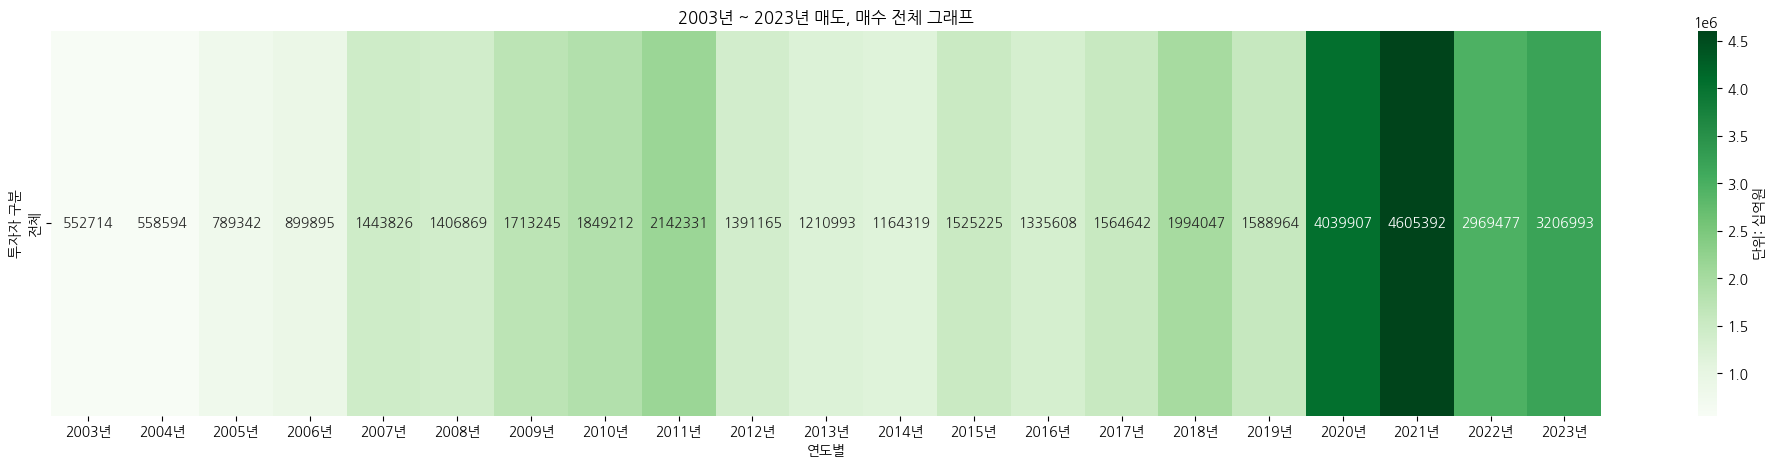

In [42]:
# 2003 ~ 2023 매도, 매수 전체 그래프
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

institutional_invest = invest_sell.loc[['전체']]

plt.figure(figsize=(25, 5))
sns.heatmap(institutional_invest, annot=True, fmt=".0f", cmap="Greens", cbar_kws={'label': '단위: 십억원'})
plt.title("2003년 ~ 2023년 매도, 매수 전체 그래프")
plt.xlabel("연도별")
plt.ylabel("투자자 구분")
plt.show()

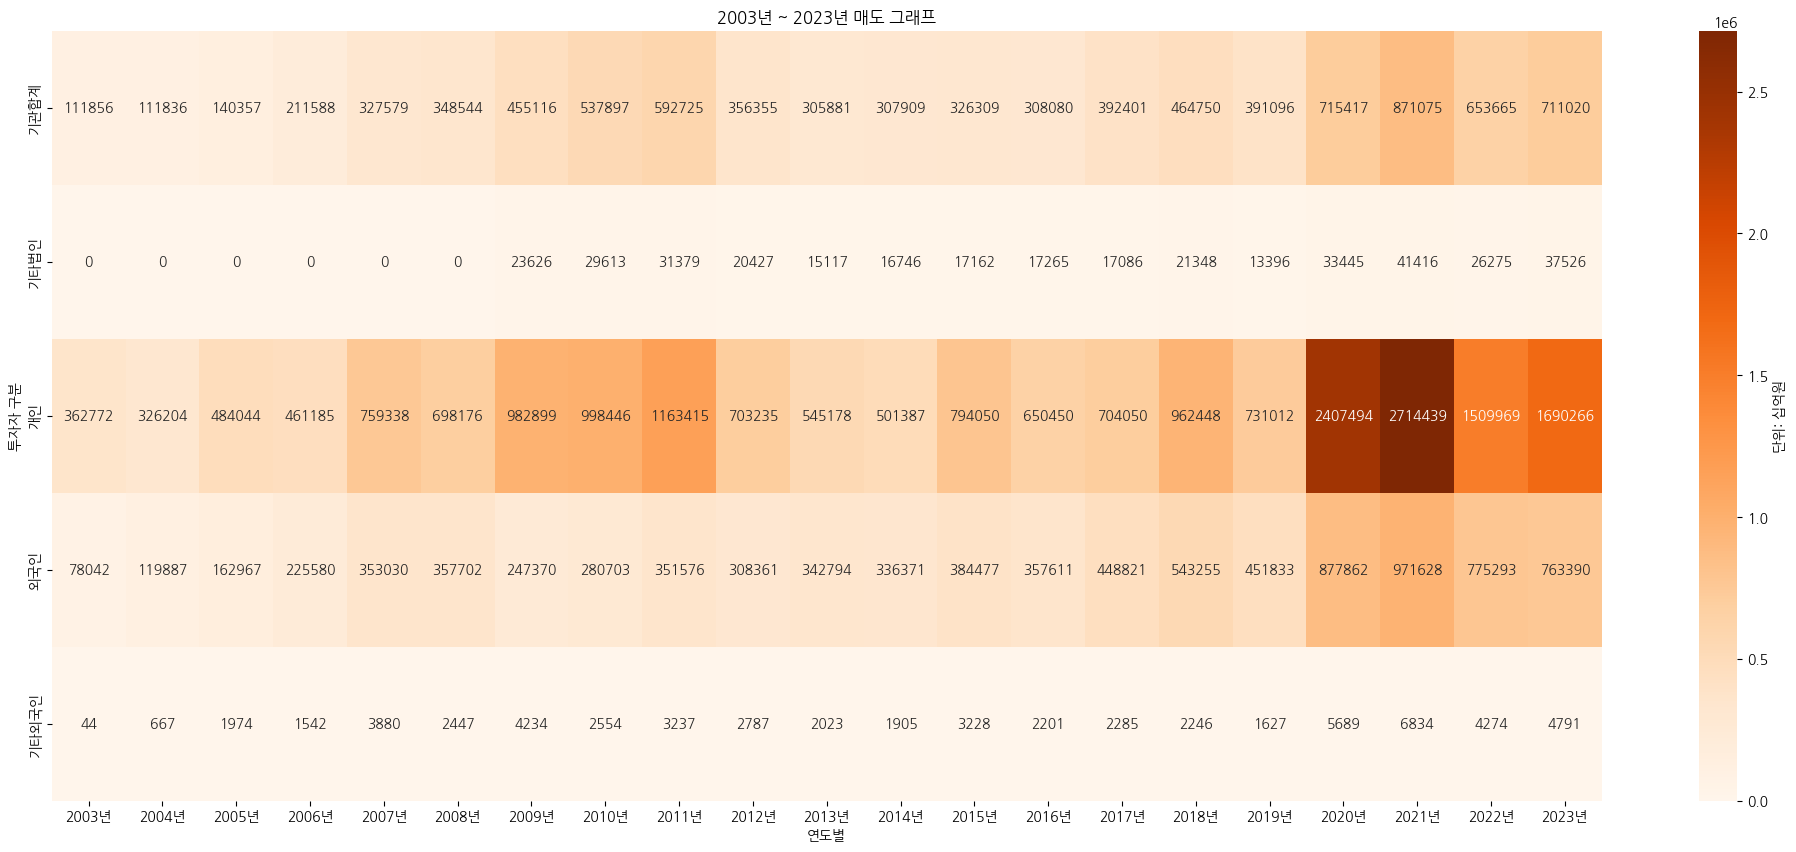

In [44]:
# 2003 ~ 2023 매도 그래프
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

invest_sell_except_total = invest_sell.drop("전체")

plt.figure(figsize=(25, 10))
sns.heatmap(invest_sell_except_total, annot=True, fmt=".0f", cmap="Oranges", cbar_kws={'label': '단위: 십억원'})
plt.title("2003년 ~ 2023년 매도 그래프")
plt.xlabel("연도별")
plt.ylabel("투자자 구분")
plt.show()

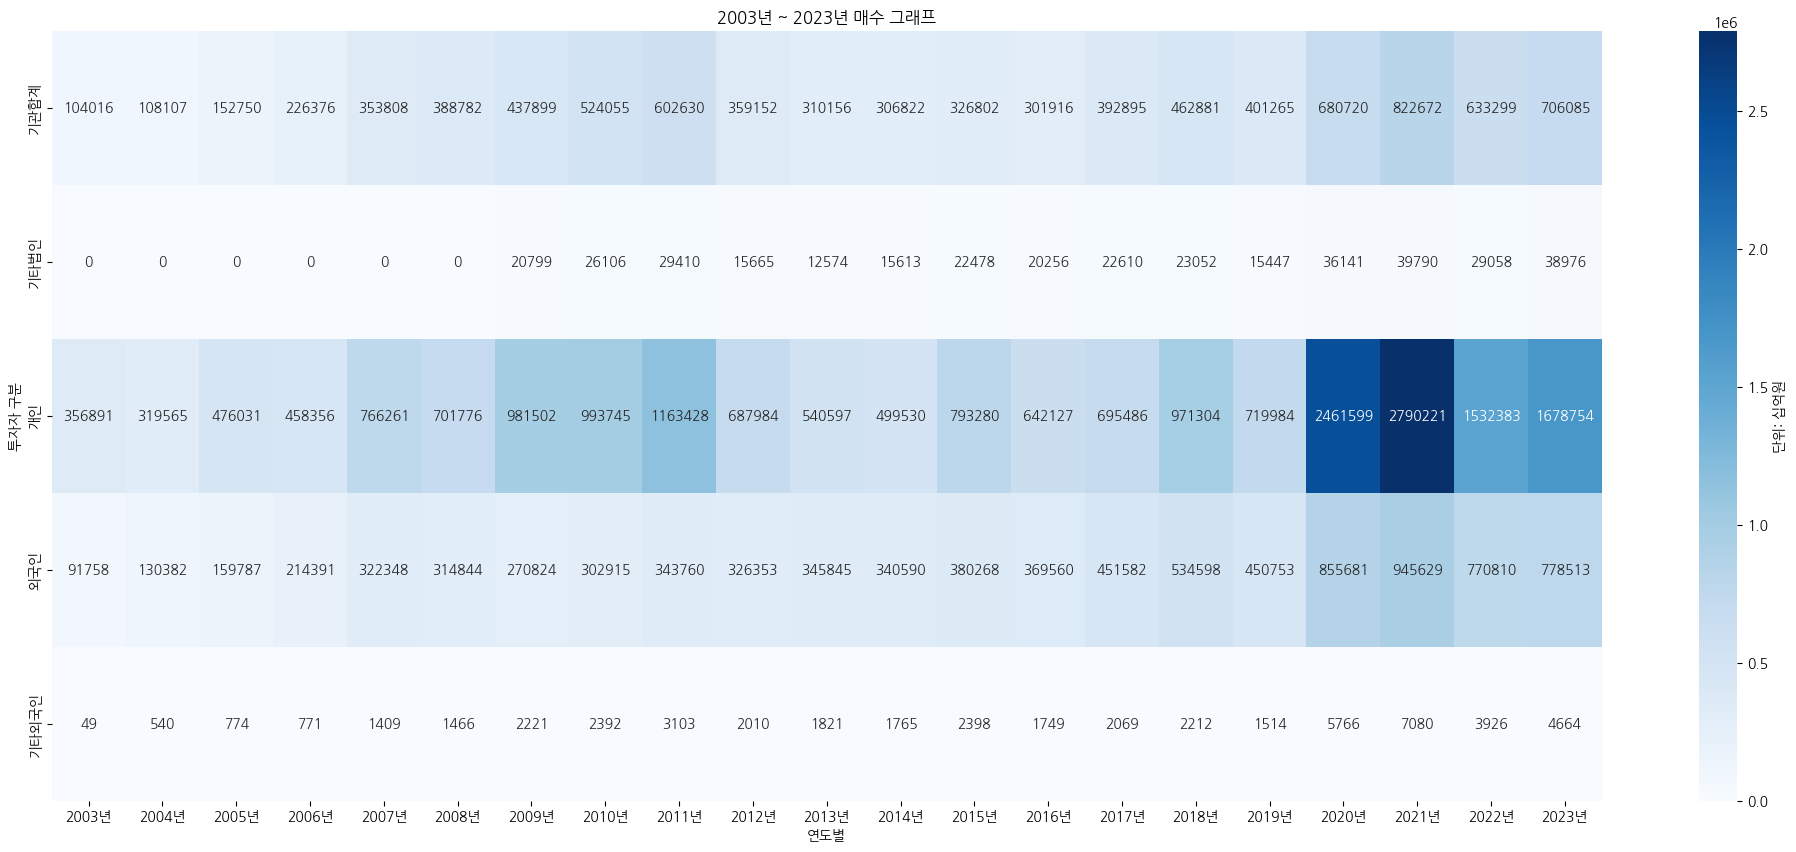

In [45]:
# 2003 ~ 2023 매수 그래프
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

invest_buy_except_total = invest_buy.drop("전체")

plt.figure(figsize=(25, 10))
sns.heatmap(invest_buy_except_total, annot=True, fmt=".0f", cmap="Blues", cbar_kws={'label': '단위: 십억원'})
plt.title("2003년 ~ 2023년 매수 그래프")
plt.xlabel("연도별")
plt.ylabel("투자자 구분")
plt.show()

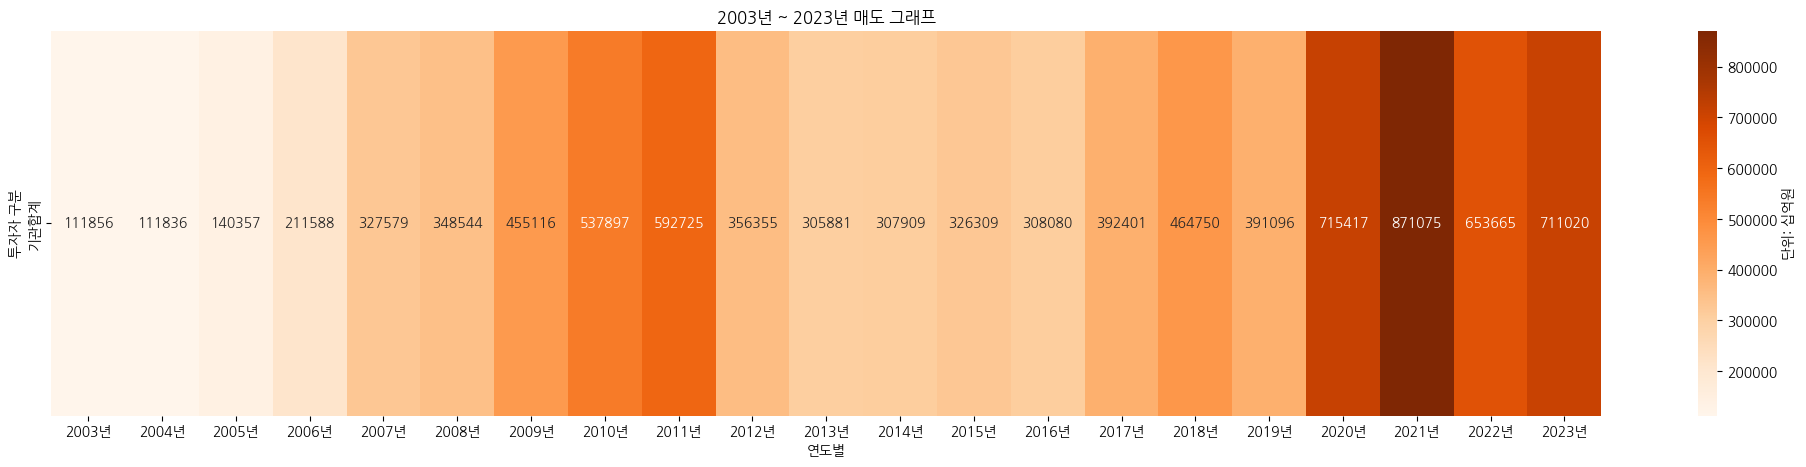

In [47]:
# 2003 ~ 2023 매도 기관합계 그래프
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

institutional_invest = invest_sell.loc[['기관합계']]

plt.figure(figsize=(25, 5))
sns.heatmap(institutional_invest, annot=True, fmt=".0f", cmap="Oranges", cbar_kws={'label': '단위: 십억원'})
plt.title("2003년 ~ 2023년 매도 그래프")
plt.xlabel("연도별")
plt.ylabel("투자자 구분")
plt.show()


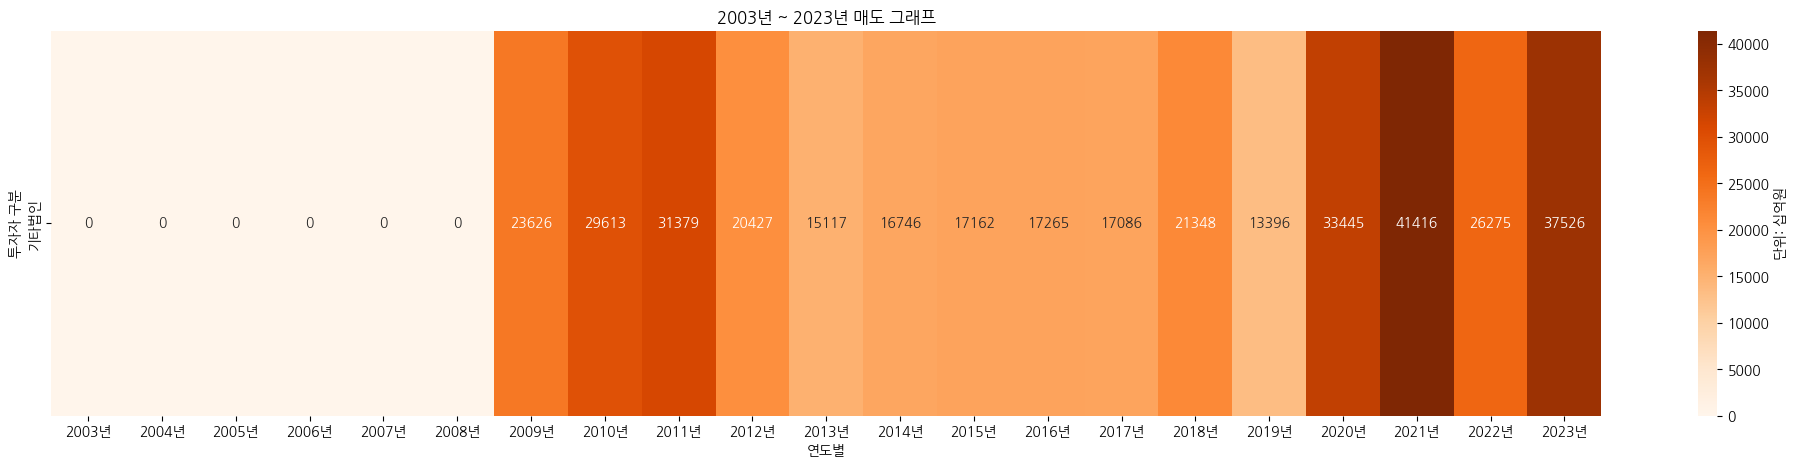

In [48]:
# 2003 ~ 2023 매도 기타법인 그래프
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

institutional_invest = invest_sell.loc[['기타법인']]

plt.figure(figsize=(25, 5))
sns.heatmap(institutional_invest, annot=True, fmt=".0f", cmap="Oranges", cbar_kws={'label': '단위: 십억원'})
plt.title("2003년 ~ 2023년 매도 그래프")
plt.xlabel("연도별")
plt.ylabel("투자자 구분")
plt.show()


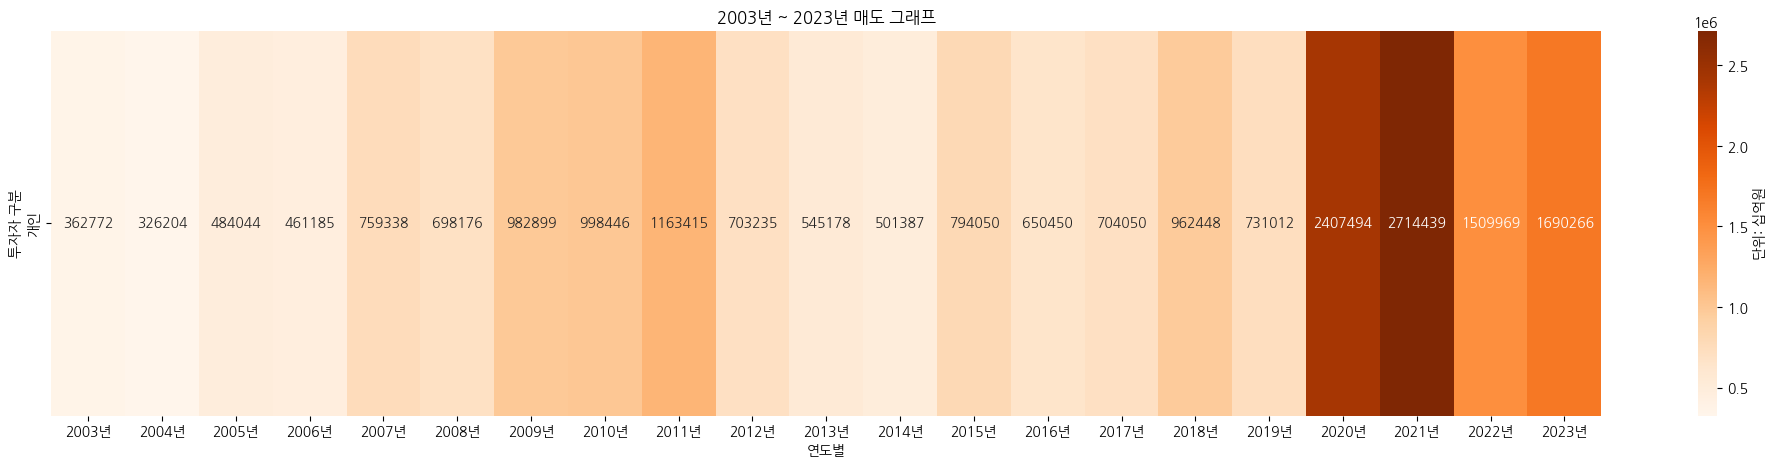

In [49]:
# 2003 ~ 2023 매도 개인 그래프
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

institutional_invest = invest_sell.loc[['개인']]

plt.figure(figsize=(25, 5))
sns.heatmap(institutional_invest, annot=True, fmt=".0f", cmap="Oranges", cbar_kws={'label': '단위: 십억원'})
plt.title("2003년 ~ 2023년 매도 그래프")
plt.xlabel("연도별")
plt.ylabel("투자자 구분")
plt.show()


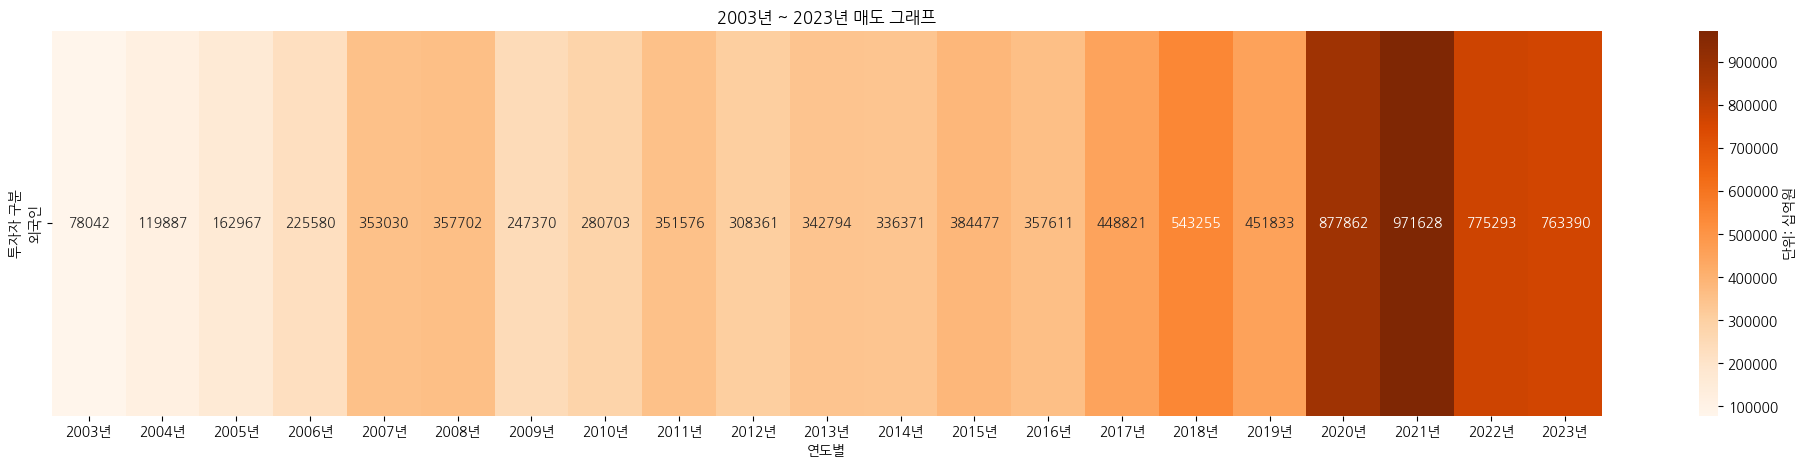

In [50]:
# 2003 ~ 2023 매도 외국인 그래프
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

institutional_invest = invest_sell.loc[['외국인']]

plt.figure(figsize=(25, 5))
sns.heatmap(institutional_invest, annot=True, fmt=".0f", cmap="Oranges", cbar_kws={'label': '단위: 십억원'})
plt.title("2003년 ~ 2023년 매도 그래프")
plt.xlabel("연도별")
plt.ylabel("투자자 구분")
plt.show()


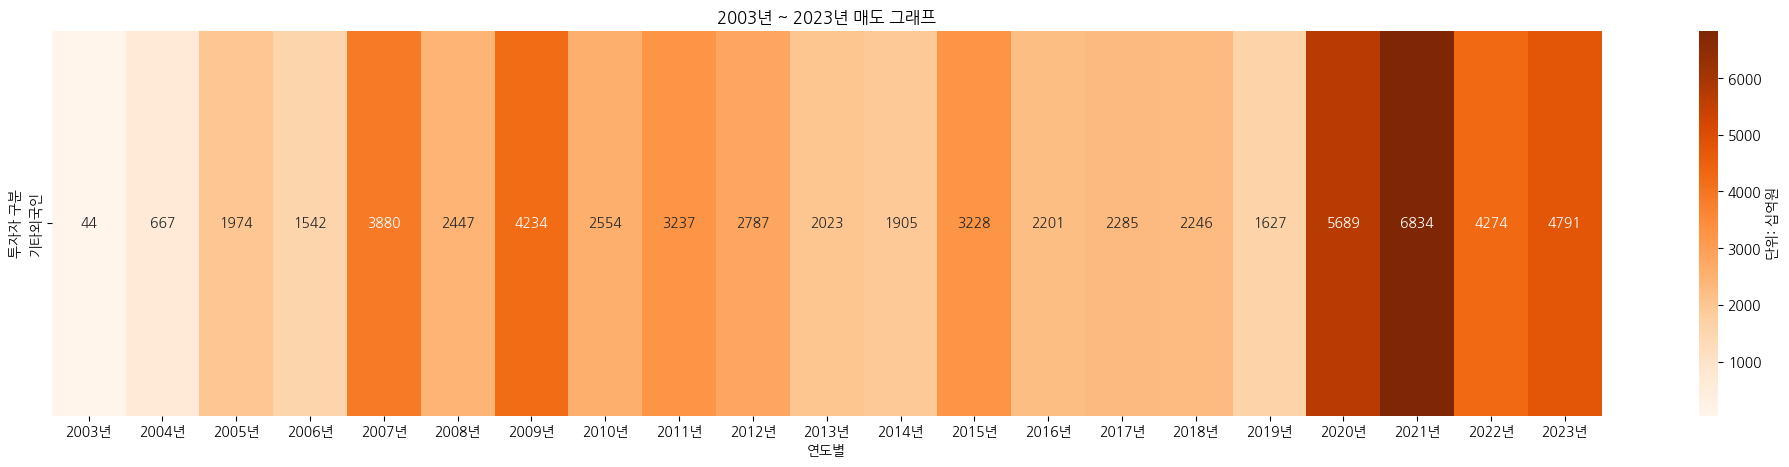

In [51]:
# 2003 ~ 2023 매도 기타외국인 그래프
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

institutional_invest = invest_sell.loc[['기타외국인']]

plt.figure(figsize=(25, 5))
sns.heatmap(institutional_invest, annot=True, fmt=".0f", cmap="Oranges", cbar_kws={'label': '단위: 십억원'})
plt.title("2003년 ~ 2023년 매도 그래프")
plt.xlabel("연도별")
plt.ylabel("투자자 구분")
plt.show()


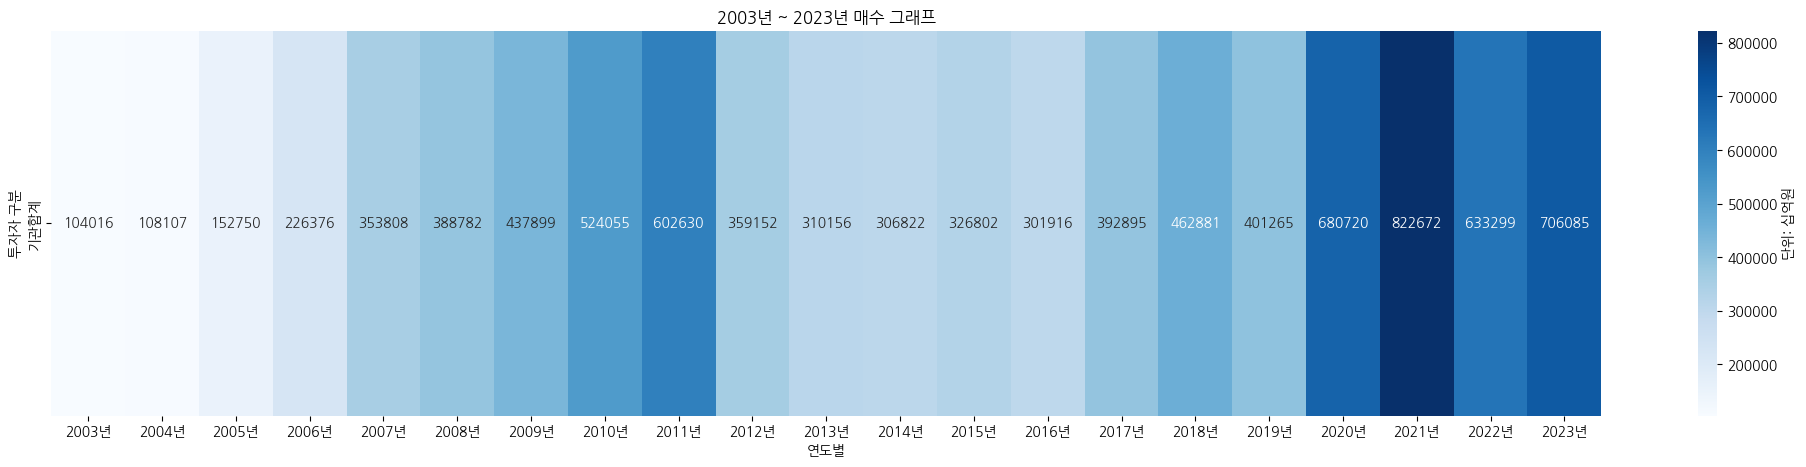

In [52]:
# 2003 ~ 2023 매수 기관합계 그래프
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

institutional_invest = invest_buy.loc[['기관합계']]

plt.figure(figsize=(25, 5))
sns.heatmap(institutional_invest, annot=True, fmt=".0f", cmap="Blues", cbar_kws={'label': '단위: 십억원'})
plt.title("2003년 ~ 2023년 매수 그래프")
plt.xlabel("연도별")
plt.ylabel("투자자 구분")
plt.show()

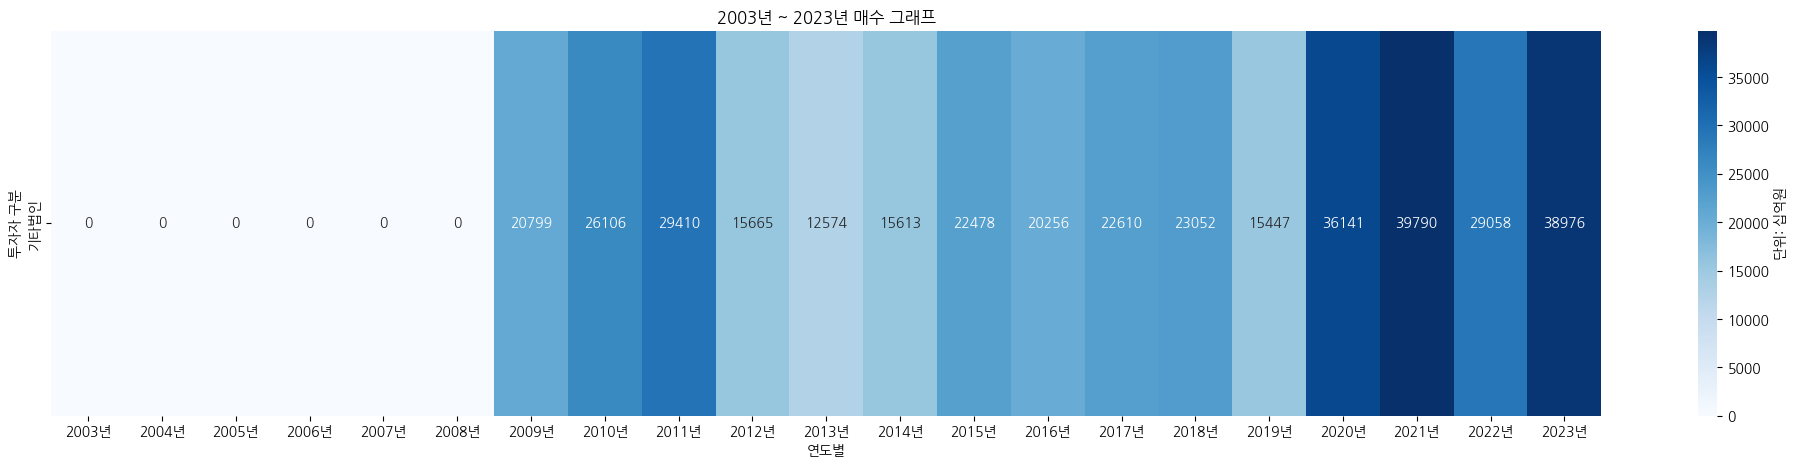

In [53]:
# 2003 ~ 2023 매수 기타법인 그래프
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

institutional_invest = invest_buy.loc[['기타법인']]

plt.figure(figsize=(25, 5))
sns.heatmap(institutional_invest, annot=True, fmt=".0f", cmap="Blues", cbar_kws={'label': '단위: 십억원'})
plt.title("2003년 ~ 2023년 매수 그래프")
plt.xlabel("연도별")
plt.ylabel("투자자 구분")
plt.show()

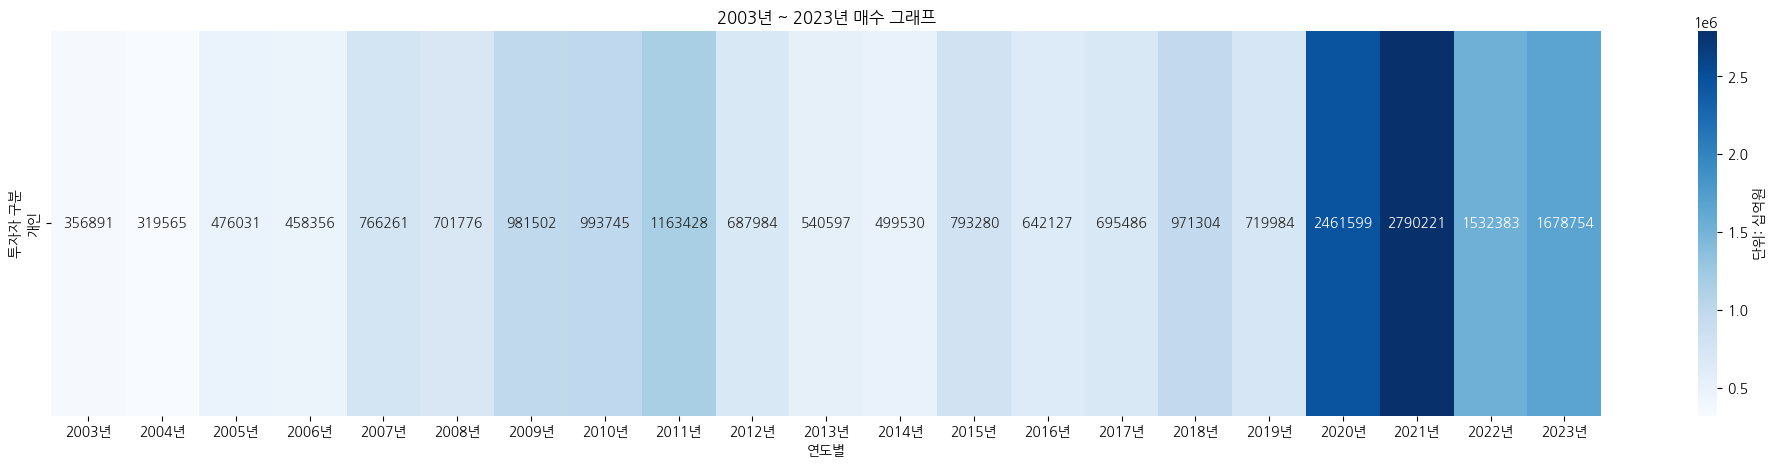

In [55]:
# 2003 ~ 2023 매수 개인 그래프
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

institutional_invest = invest_buy.loc[['개인']]

plt.figure(figsize=(25, 5))
sns.heatmap(institutional_invest, annot=True, fmt=".0f", cmap="Blues", cbar_kws={'label': '단위: 십억원'})
plt.title("2003년 ~ 2023년 매수 그래프")
plt.xlabel("연도별")
plt.ylabel("투자자 구분")
plt.show()

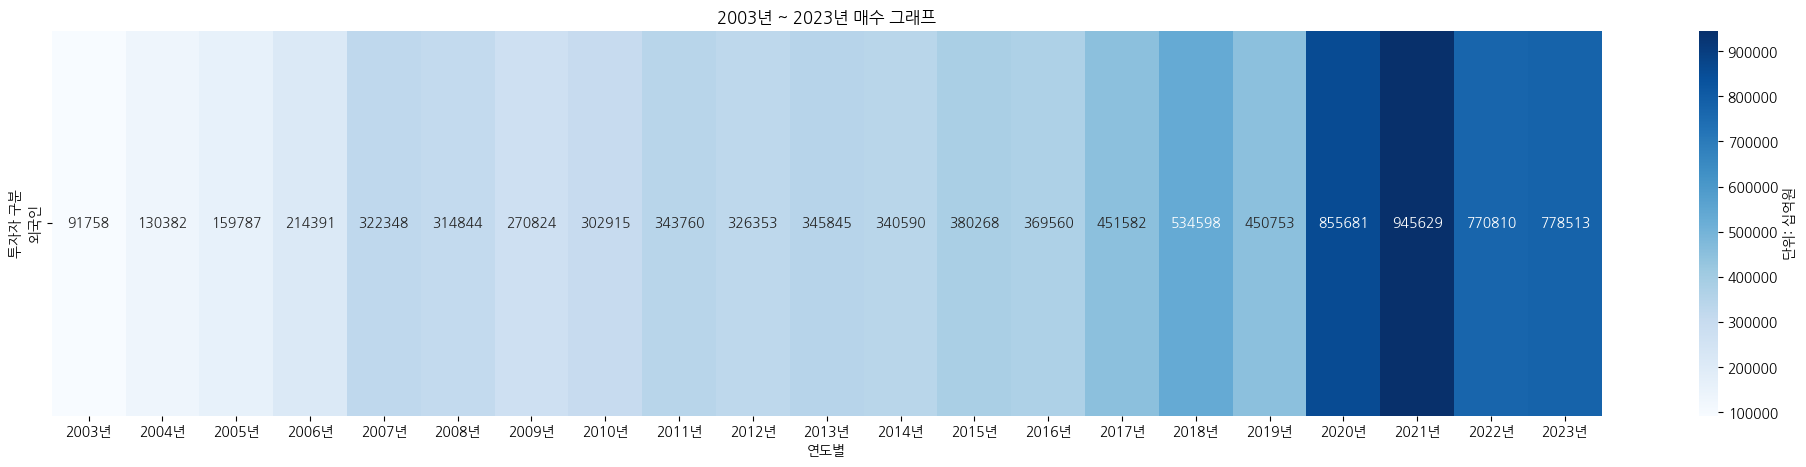

In [56]:
# 2003 ~ 2023 매수 외국인 그래프
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

institutional_invest = invest_buy.loc[['외국인']]

plt.figure(figsize=(25, 5))
sns.heatmap(institutional_invest, annot=True, fmt=".0f", cmap="Blues", cbar_kws={'label': '단위: 십억원'})
plt.title("2003년 ~ 2023년 매수 그래프")
plt.xlabel("연도별")
plt.ylabel("투자자 구분")
plt.show()

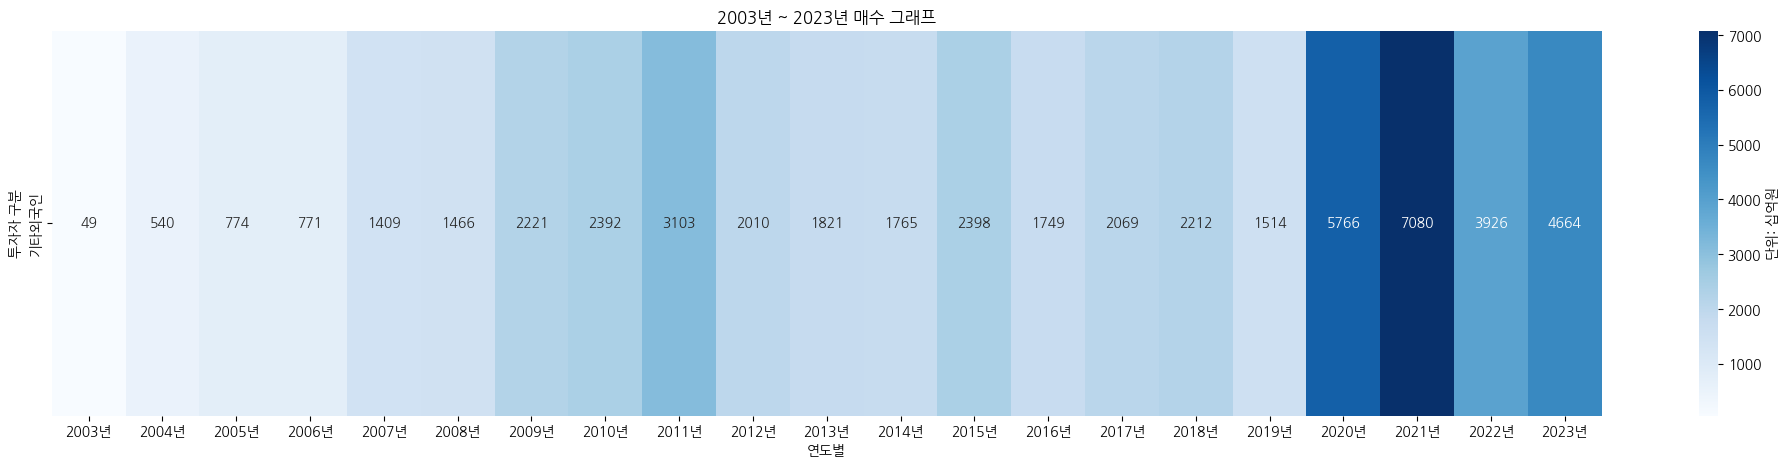

In [57]:
# 2003 ~ 2023 매수 기타외국인 그래프
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

institutional_invest = invest_buy.loc[['기타외국인']]

plt.figure(figsize=(25, 5))
sns.heatmap(institutional_invest, annot=True, fmt=".0f", cmap="Blues", cbar_kws={'label': '단위: 십억원'})
plt.title("2003년 ~ 2023년 매수 그래프")
plt.xlabel("연도별")
plt.ylabel("투자자 구분")
plt.show()

/home/tonality/venv/eda_venv/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/home/tonality/venv/eda_venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


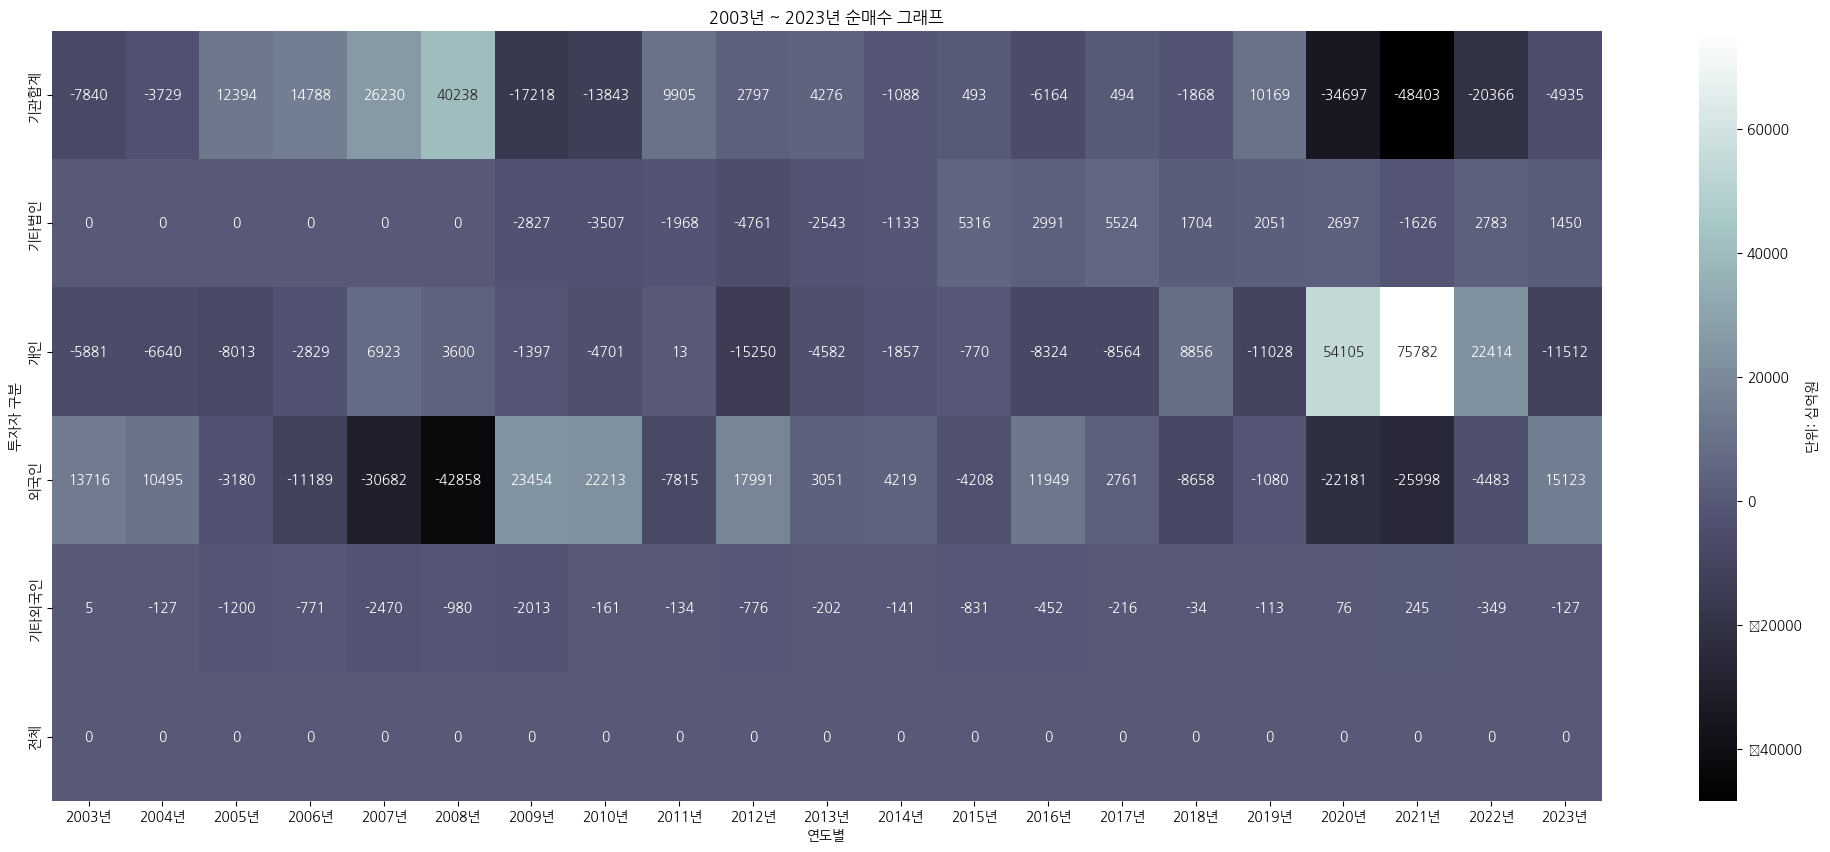

In [58]:
# 2003 ~ 2023 순매수 그래프
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(25, 10))
sns.heatmap(invest_netbuy, annot=True, fmt=".0f", cmap="bone", cbar_kws={'label': '단위: 십억원'})
plt.title("2003년 ~ 2023년 순매수 그래프")
plt.xlabel("연도별")
plt.ylabel("투자자 구분")
plt.show()

/home/tonality/venv/eda_venv/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/home/tonality/venv/eda_venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


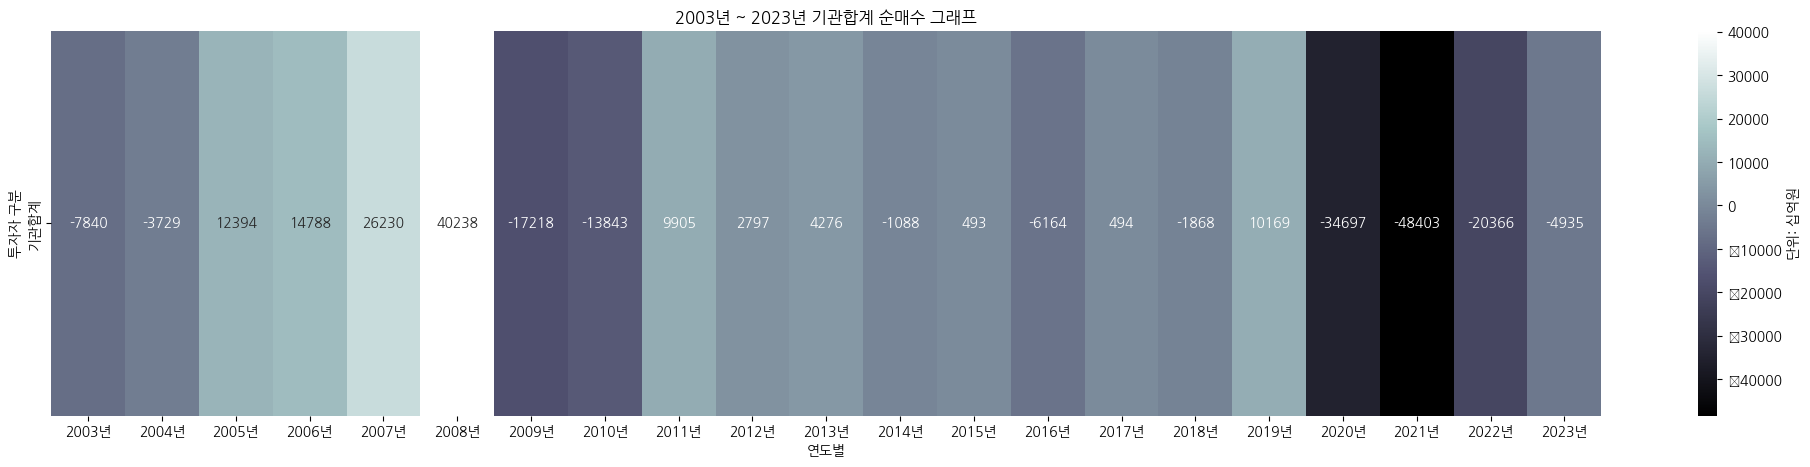

In [59]:
# 2003 ~ 2023 기관합계 순매수 그래프
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

institutional_invest = invest_netbuy.loc[['기관합계']]

plt.figure(figsize=(25, 5))
sns.heatmap(institutional_invest, annot=True, fmt=".0f", cmap="bone", cbar_kws={'label': '단위: 십억원'})
plt.title("2003년 ~ 2023년 기관합계 순매수 그래프")
plt.xlabel("연도별")
plt.ylabel("투자자 구분")
plt.show()

/home/tonality/venv/eda_venv/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/home/tonality/venv/eda_venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


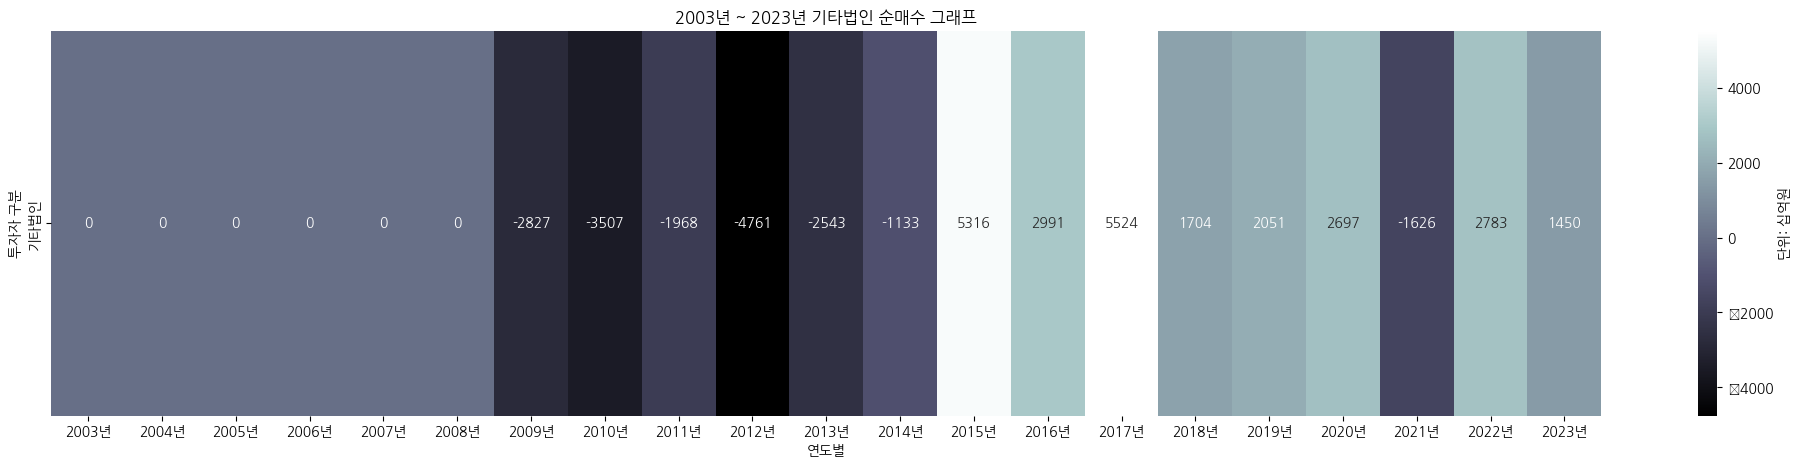

In [60]:
# 2003 ~ 2023 기타법인 순매수 그래프
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

# 기관합계(index='기관합계') 인덱스만을 포함한 데이터프레임 생성
institutional_invest = invest_netbuy.loc[['기타법인']]

# 히트맵 그리기
plt.figure(figsize=(25, 5))  # 기관합계만 있으므로 높이를 조정하여 표시합니다.
sns.heatmap(institutional_invest, annot=True, fmt=".0f", cmap="bone", cbar_kws={'label': '단위: 십억원'})
plt.title("2003년 ~ 2023년 기타법인 순매수 그래프")
plt.xlabel("연도별")
plt.ylabel("투자자 구분")
plt.show()

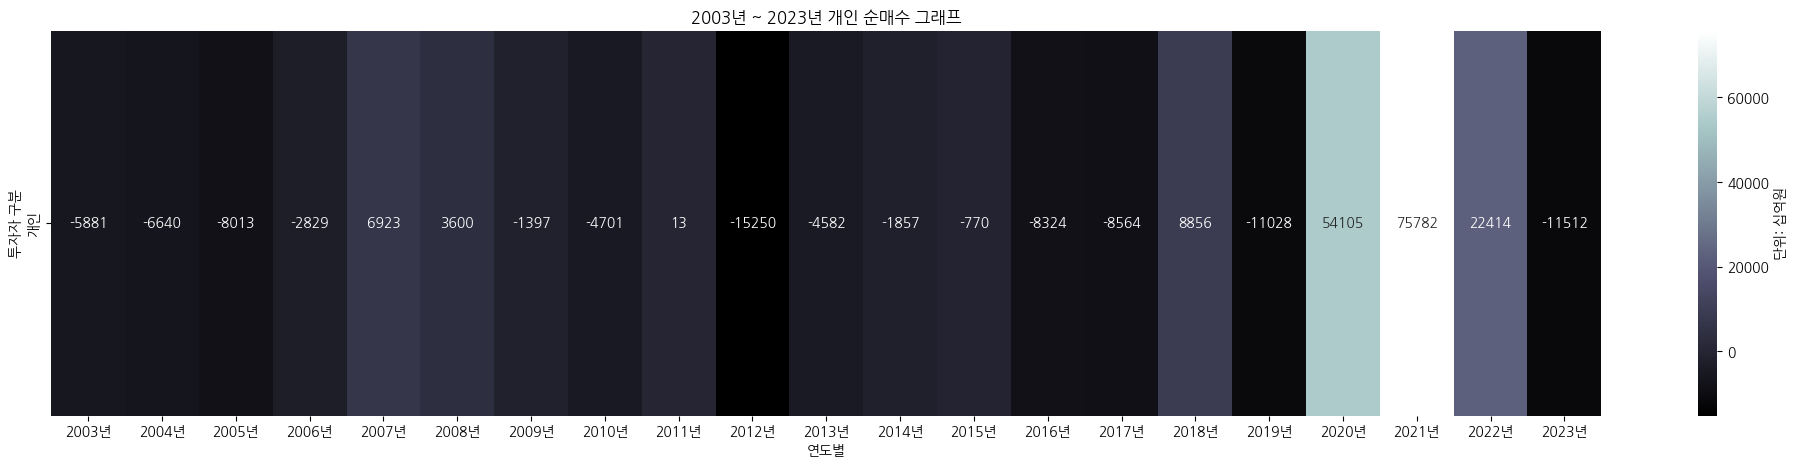

In [61]:
# 2003 ~ 2023 개인 순매수 그래프
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

institutional_invest = invest_netbuy.loc[['개인']]

plt.figure(figsize=(25, 5))
sns.heatmap(institutional_invest, annot=True, fmt=".0f", cmap="bone", cbar_kws={'label': '단위: 십억원'})
plt.title("2003년 ~ 2023년 개인 순매수 그래프")
plt.xlabel("연도별")
plt.ylabel("투자자 구분")
plt.show()

/home/tonality/venv/eda_venv/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/home/tonality/venv/eda_venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


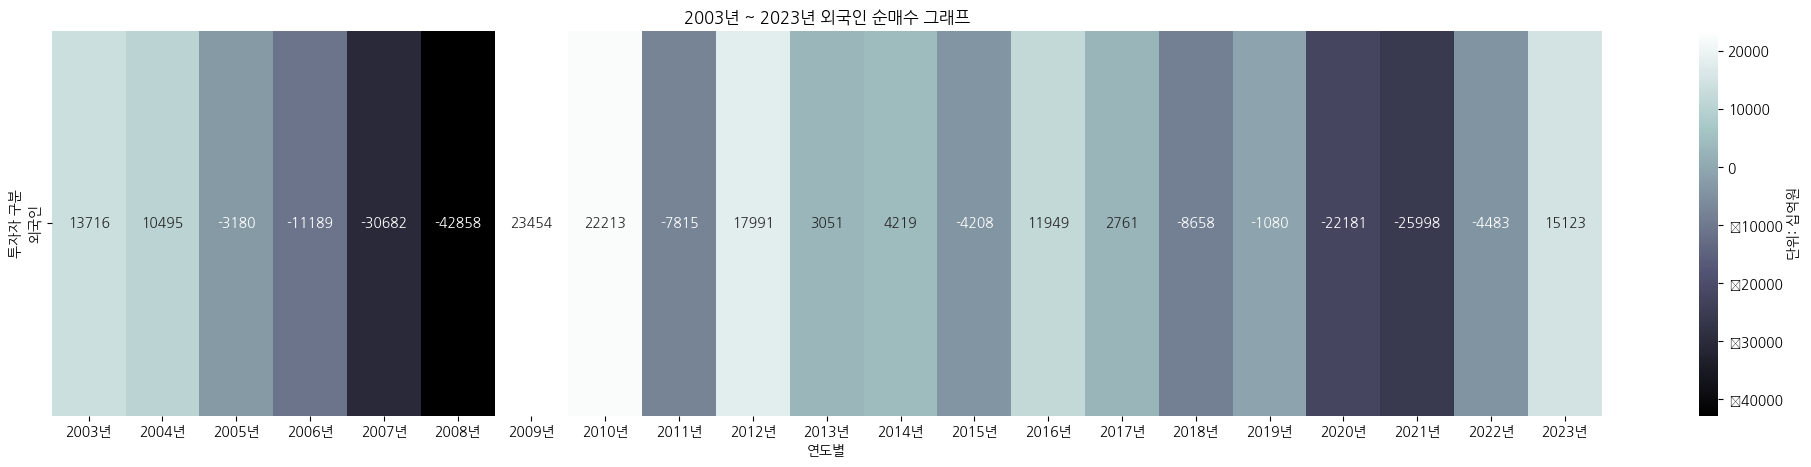

In [62]:
# 2003 ~ 2023 외국인 순매수 그래프
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

institutional_invest = invest_netbuy.loc[['외국인']]

plt.figure(figsize=(25, 5))
sns.heatmap(institutional_invest, annot=True, fmt=".0f", cmap="bone", cbar_kws={'label': '단위: 십억원'})
plt.title("2003년 ~ 2023년 외국인 순매수 그래프")
plt.xlabel("연도별")
plt.ylabel("투자자 구분")
plt.show()

/home/tonality/venv/eda_venv/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/home/tonality/venv/eda_venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


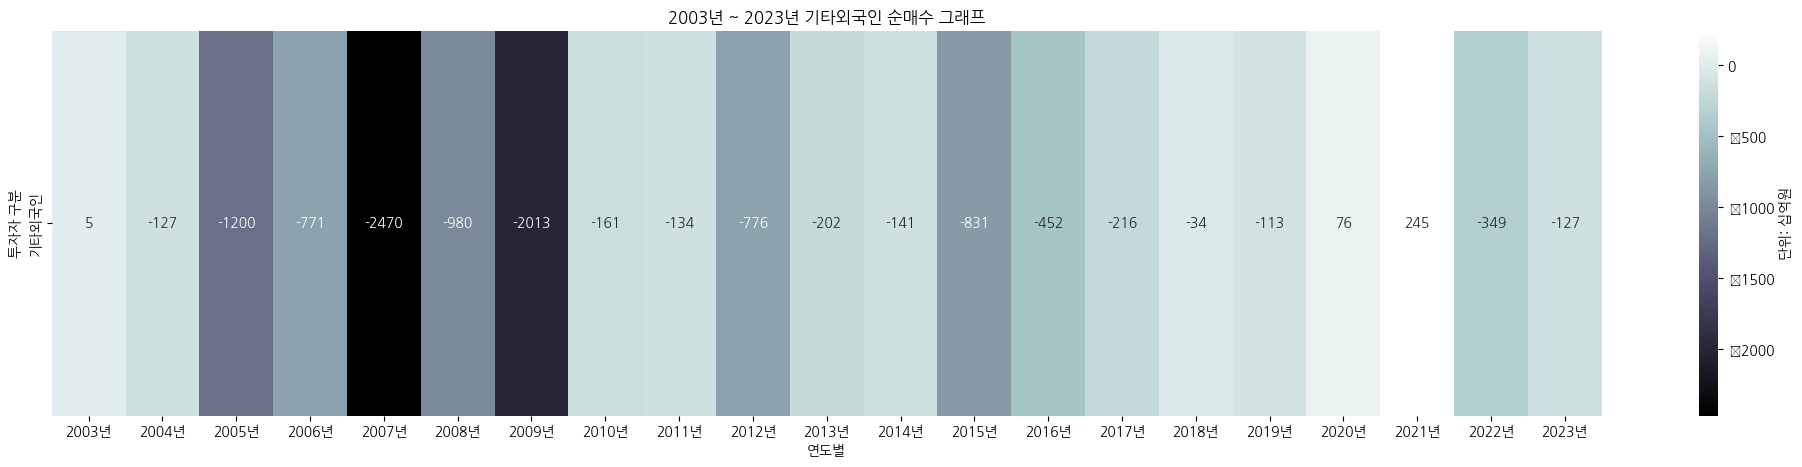

In [63]:
# 2003 ~ 2023 기타외국인 순매수 그래프
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

institutional_invest = invest_netbuy.loc[['기타외국인']]


plt.figure(figsize=(25, 5))
sns.heatmap(institutional_invest, annot=True, fmt=".0f", cmap="bone", cbar_kws={'label': '단위: 십억원'})
plt.title("2003년 ~ 2023년 기타외국인 순매수 그래프")
plt.xlabel("연도별")
plt.ylabel("투자자 구분")
plt.show()